## Parker Dunn

### EK 381 - HW 10
### DUE: 3 December 2021

In [1]:
# Import Necessary Modules

import glob
import matplotlib.pyplot as plt 
from skimage import io
import numpy as np
%matplotlib inline

# MY IMPORTS
import math

In [2]:
#This function reads in all n images in catsfolder/ and dogsfolder/. 
#Each 64 x 64 image is reshaped into a length-4096 row vector. 
#These row vectors are stacked on top of one another to get a data matrix
#X of size n x 4096. We also generate a -1 label if the row vector corresponds
#to a cat image and a +1 label if the row vector corresponds to a dog image
#and stack these on top of one another to get a label vector y of length n.

def read_data():
    
    # get image filenames
    cat_locs = glob.glob('petdataset/catsfolder/*.jpg')
    dog_locs = glob.glob('petdataset/dogsfolder/*.jpg')
    num_cats = len(cat_locs)
    num_dogs = len(dog_locs)
    
    # initialize empty arrays
    X_cats = np.zeros((num_cats,64*64))
    X_dogs = np.zeros((num_dogs,64*64))
    y_cats = np.zeros((num_cats,1))
    y_dogs = np.zeros((num_dogs,1))
              
    #Load data, reshape into a 1D vector and set labels
    
    keep_track = 0

    for i in range(num_cats):
        img = cat_locs[i]
        im = io.imread(img)
        im = im.reshape(64*64)
        X_cats[i,:] = im
        y_cats[i] = -1.0
        keep_track += 1

    for i in range(num_dogs):
        img = dog_locs[i]
        im = io.imread(img)
        im = im.reshape(64*64)
        X_dogs[i,:] = im
        y_dogs[i] = 1.0
        keep_track += 1
    
    # combine both datasets
    X = np.append(X_cats,X_dogs,0)
    y = np.append(y_cats,y_dogs)
    
    return X, y 

In [3]:
#This function takes in an n x 4096 data matrix X and an index i. It extracts
#the ith row of X and displays it as a grayscale 64 x 64 image.

def show_image(X, i):
    #select image
    image = X[i,:]
    #reshape make into a square
    image = image.reshape((64,64))
    #display the image
    plt.imshow(image,'gray')

(2000, 4096)


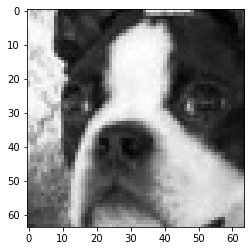

In [4]:
#Read in data (look at one specific image by uncommenting show_image).
X,y = read_data()
print(X.shape)
show_image(X,1505)

In [5]:
#This function takes in a vector of true labels ytrue
#and a vector of guessed labels yguess and reports back
#the error rate of the guesses as a percentage 0% to 100%.

def error_rate(ytrue, yguess):
    # compare your predictions with the correct labels to determine how many of your predictions were correct.
    total = len(ytrue)
    wrong = np.sum(np.not_equal(ytrue,yguess))
    error = 100*wrong/total
    # divide the number of correct predictions by the number of total samples to determine your classification accuracy.
    return error

In [6]:
#This function takes in a data matrix X, label vector y, and 
#the desired percentage testpercent. It randomly assigns  
#testpercent of the rows of X and y to Xtest and ytest. 
#The remaining data is assigned to Xtrain and ytrain.

def split_data(X,y,testpercent):
        
    [n, d] = X.shape
    
    ntest = int(round(n*(float(testpercent)/100)))
    ntrain = int(round(n - ntest))
        
    Xtrain = np.zeros((ntrain,d))
    Xtest = np.zeros((ntest,d))
    ytrain = np.zeros((ntrain,1))
    ytest = np.zeros((ntest,1))   
        
    Data = np.column_stack((X,y))
    Data = np.random.permutation(Data)
    
    for i in range(ntest):
        Xtest[i,:] = Data[i,0:d]
        ytest[i] = Data[i,d]
        
    for i in range(ntrain):
        Xtrain[i,:] = Data[i+ntest,0:d]
        ytrain[i] = Data[i+ntest,d]
        
    return Xtrain, ytrain, Xtest, ytest

### In the section below, the data is split into testing and training data

In [7]:
#split into training and test data
Xtrain, ytrain, Xtest, ytest = split_data(X,y,20)

In [8]:
#This code implements the PCA exactly as in MATLAB so as to be consistent.
#It takes in an n x d data matrix X and returns a d x d orthonormal matrix pcaX. 
#Each column of pcaX contains a basis vector, sorted by decreasing variance.

def pca(X):
    covX = np.cov(X,rowvar=False)
    [Lambda,Vtranspose] = np.linalg.eig(covX)
    neworder = np.argsort(-abs(Lambda))
    pcaX = Vtranspose[:,neworder]
    pcaX = pcaX.real

    return pcaX

### Function for Question 10.1
The function below was modified for Problem 10.1 of the homework.
The function considers some X matrix of image data the corresponding y vector with the true labels for each image. From the data, the function builds a vector that represents the average image of a dog and the average image of a cat based on each of the 64 x 64 pixels.

In [9]:
#This function takes in a data matrix X and a label
#vector y and outputs the average cat image and average dog image.

def average_pet(X,y):
    logical_vec_dog = []
    for classification in y:
        if (classification == 1):
            logical_vec_dog.append(1)
        else:
            logical_vec_dog.append(0)
    logical_vec_cat = []
    for classification in y:
        if (classification == -1):
            logical_vec_cat.append(1)
        else:
            logical_vec_cat.append(0)
#     print(logical_vec_dog)
#     print(logical_vec_cat)
    
    X_dog = X[(np.array(logical_vec_dog) > 0),:]
#     print(X_dog.shape)
    X_cat = X[(np.array(logical_vec_cat) > 0),:]
#     print(X_cat.shape)
    
    avgcat_column = np.array([np.mean(X_cat, axis = 0)])
    avgdog_column = np.array([np.mean(X_dog, axis = 0)])
#     print("From average_pet() function, shapes of avg_cat and avg_dog:")
#     print(avgcat_column.shape)
#     print(avgdog_column.shape)
    avgcat = avgcat_column
    avgdog = avgdog_column
#     avgcat = np.transpose(avgcat_column)
#     avgdog = np.transpose(avgdog_column)
#     print(avgcat.shape)
#     print(avgdog.shape)

    
    #Your code should go above this line.
    if (avgcat.shape[0]!=1): 
        raise Exception("The variable avgcat is not a row vector.")
    elif (avgcat.shape[1]!=X.shape[1]):
        raise Exception("The variable avgcat does not have the same number of columns as the input X.")
    elif (avgdog.shape[0]!=1): 
        raise Exception("The variable avgdog is not a row vector.")
    elif (avgdog.shape[1]!=X.shape[1]): 
        raise Exception("The variable avgdog does not have the same number of columns as the input X.")
     
    return avgcat, avgdog

From average_pet() function, shapes of avg_cat and avg_dog:
(1, 4096)
(1, 4096)
Average Cat


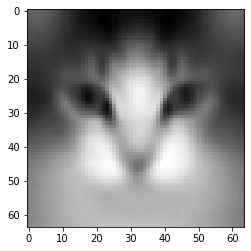

In [10]:
#Problem 10.1
avgcat,avgdog = average_pet(X,y)
print ('Average Cat')
show_image(avgcat,0)

Average Dog


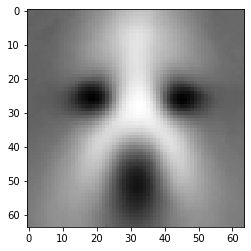

In [11]:
print ('Average Dog')
show_image(avgdog,0)

## Function below is for Problem 10.2 of the HW

**Function below is meant to use only the training data to develop the "average cat" and "average dog" images/vectors.

This function is a very simple version of a detector. The function determines whether an input image (as a vector of the image pixels) more closely resembles the average dog or average cat vector that was developed in the previous problem.


This is a first (and simplistic) approach to classifying these images as cats or dogs.

In [12]:
#This function takes in a training data matrix Xtrain, training
#label vector ytrain and uses them to compute the average cat
#and dog vectors. It also takes in a data matrix Xrun and 
#produces a vector of label guesses yguess, corresponding to whether
#each row of Xtest is closer to the average cat or average dog.

def closest_average(Xtrain,ytrain,Xrun):
    avg_cat, avg_dog = average_pet(Xtrain, ytrain)
    # For each row of Xrun ... determine whether the differences are smaller for avg_cat or avg_dog
    # select each row
    # find difference in every column
    # sum up the differences
    # select cat or dog as prediction based on which difference is smaller
    yguess = np.zeros((Xrun.shape[0], 1))
    print(yguess.shape)
    
    for i in range(Xrun.shape[0]):  # i from 0 to # of rows in Xrun
        cat_err = math.sqrt( np.sum( (Xrun[i,:] - avg_cat)**2 ) )
        dog_err = math.sqrt( np.sum( (Xrun[i,:] - avg_dog)**2 ) )
        if (cat_err >= dog_err):
            yguess[i,0] = 1           # cat_err greater --> MORE LIKELY A DOG
        else:
            yguess[i,0] = -1         # dog_err greater than or equal --> MORE LIKELY CAT

    #Your code should go above this line.
    if (not(isinstance(yguess,np.ndarray))):
        raise Exception("yguess is not of the correct type. It should be a numpy array.")
    elif (yguess.shape[1] != 1):
        raise Exception("yguess is not a column vector.")
    elif (yguess.shape[0] != Xrun.shape[0]):
        raise Exception("Length of yguess is not equal to the number of rows in Xrun.")
    elif (sum(np.unique(np.absolute(yguess))!=1)):
        raise Warning("Some elements in yguess are not +1 or -1.") 
        
    return yguess

In [13]:
#Closest average training error rate is [YOUR VALUE].
#Closest average test error rate is [YOUR VALUE].

#Problem 10.2
yguesstrain = closest_average(Xtrain,ytrain,Xtrain)
yguesstest = closest_average(Xtrain,ytrain,Xtest)
training_error = error_rate(yguesstrain,ytrain)
test_error = error_rate(yguesstest,ytest)

print ("Closest average training error rate is "+str(round(training_error,1))+"%.")
print ("Closest average test error is rate "+str(round(test_error,1))+"%.")

From average_pet() function, shapes of avg_cat and avg_dog:
(1, 4096)
(1, 4096)
(1600, 1)
From average_pet() function, shapes of avg_cat and avg_dog:
(1, 4096)
(1, 4096)
(400, 1)
Closest average training error rate is 19.6%.
Closest average test error is rate 21.5%.


#### Results from 10.2
* Closest average **training error** rate is **19.6%**
* Closest average **test error** rate is **21.5%**

__NOTE:__ These numbers changed a bit when I opened and re-ran this script. This is reasonable since the split is naturally going to be different each time the script is re-run.

However, after the initial re-run, there are some problems with the next problem, so I wanted to make note of the fact that these values also changed even though the values were initially and continue to be close to 20%.

__Error Values from this Section:__
* Run 1: *forgot to save - but they were similar to run 2*
* Run 2: 20.2% and 17.5%
* Run 3: 19.6% and 21.5%


### Next two code blocks, including `nearest_neighbor` function, are for PROBLEM 10.3

The next problem on the hw asks me to use a different approach to classifying each row of data as a cat or a dog. In this approach, we look for the most similar row of the training data. 

Whatever row is the the most similar, we presume to be best classification for the data.

In [14]:
#This function takes in a training data matrix Xtrain, training
#label vector ytrain and uses them to compute the average cat
#and dog vectors. It also takes in a data matrix Xrun and 
#produces a vector of label guesses yguess. Each guess is found
#by searching through Xtrain to find the closest row, and then 
#outputting its label.

def nearest_neighbor(Xtrain,ytrain,Xrun):
    # creating the output vector first
    yguess = np.zeros((Xrun.shape[0], 1))
#     print(yguess.shape)
    
    nn_row = 0
    for i in range(Xrun.shape[0]):                # i from 0 to # of rows in Xrun
        for j in range(Xtrain.shape[0]):          # j from 0 to # of rows in Xtrain
            var_from_Xtrain = math.sqrt( np.sum( (Xrun[i,:] - Xtrain[j,:])**2 ) )
            if (j == 0):
                smallest_var = var_from_Xtrain
            else:
                if (smallest_var > var_from_Xtrain):
                    smallest_var = var_from_Xtrain
                    nn_row = j
        yguess[i,0] = ytrain[nn_row,0]

    
    #Your code should go above this line.
    if (not(isinstance(yguess,np.ndarray))):
        raise Exception("yguess is not of the correct type. It should be a numpy array.")
    elif (yguess.shape[1] != 1):
        raise Exception("yguess is not a column vector.")
    elif (yguess.shape[0] != Xrun.shape[0]):
        raise Exception("Length of yguess is not equal to the number of rows in Xrun.")
    elif (sum(np.unique(np.absolute(yguess))!=1)):
        raise Warning("Some elements in yguess are not +1 or -1.")  
    
    return yguess

In [15]:
#Nearest neighbor training error rate is [YOUR VALUE].
#Nearest neighbor test error rate is [YOUR VALUE].


print("Confirming the shape of ytrain: {}".format(ytrain.shape))

#Problem 10.3
yguesstrain = nearest_neighbor(Xtrain,ytrain,Xtrain)
yguesstest = nearest_neighbor(Xtrain,ytrain,Xtest)
training_error = error_rate(yguesstrain,ytrain)
test_error = error_rate(yguesstest,ytest)
print ("Nearest neighbor training error rate is "+str(round(training_error,1))+"%.")
print ("Nearest neighbor test error rate is "+str(round(test_error,1))+"%.")

Confirming the shape of ytrain: (1600, 1)
(1600, 1)
(400, 1)
Nearest neighbor training error rate is 0.0%.
Nearest neighbor test error rate is 17.5%.


#### Results for Problem 10.3

* Nearest neighbor - training error rate is 0.0%
* Nearest neighbor - test error rate is 17.5%

__Problem:__ The second run of the `nearest_neighbor()` function resulted in a non-zero error rate for the training data set, which definitely doesn't make sense.

*Hypothesis*: The method somehow memorized the previous testing data. Going to review function to see...

*Result*: Somehow the "training_error" and "test_error" lines of code in the code cell above were commented out. The values exactly match the lines of code from problem 10.2, so looks like a minor mistake.

__Errors for each run__
* Run 1 -- 0.0% and 17.5% (this makes sense to me)
* Run 2 -- 20.2% and 17.8%
* Run 3 -- 0.0% and 17.8% (back to normal)
* Run 4 -- 0.0% and 17.5%


## PROBLEM 10.4 - Next two code blocks, define "Linear Descriminant Analysis" approach to classification

__Concept__: Fit a Gaussian distribution to the cat and dog training data. These datasets will have the same covariance matrices, but the mean data for each is different, so the Gaussian distributions will be different.

By comparing the probabilies of each distribution for any row vector of image data, it is possible to decide whether the data is more likely to represent a cat or a dog.

* Should probably discuss some of the specifics of the LDA classifer at some point to familiarize myself with them a little better

In [16]:
#This function takes in a training data matrix Xtrain, training
#label vector ytrain and uses them to compute the cat
#and dog sample mean vectors as well as the sample covariance matrix 
#(which is assumed to be equal for cats and dogs). 
#It also takes in a data matrix Xrun and produces a vector of
#label guesses yguess, corresponding to the ML rule for
#jointly Gaussian vectors with different means and the same 
#covariance matrix.

def lda(Xtrain,ytrain,Xrun):
    avg_cat, avg_dog = average_pet(Xtrain, ytrain)  # mean vectors - mu cat and mu dog
    
    log_vec_cat = []
    for i in range(ytrain.shape[0]):
        if (ytrain[i,0] == 1):
            log_vec_cat.append(False)
        else:
            log_vec_cat.append(True)
    log_vec_dog = [(not log) for log in log_vec_cat]
    
    Xtrain_cat = Xtrain[log_vec_cat,:]
    Xtrain_dog = Xtrain[log_vec_dog,:]
    
    sigma_cat = np.cov(Xtrain_cat, rowvar=False)
    sigma_dog = np.cov(Xtrain_dog, rowvar=False)
    
    n_train_cat = Xtrain_cat.shape[0] # number of cat entries in training data
    n_train_dog = Xtrain_dog.shape[0] # number of dog entries in the training data
    n_train = Xtrain.shape[0]         # number of total training entries
    
    print("Shape of Covariance matrix for cat data: {}".format(sigma_cat.shape))
    print("Shape of Covariance matrix for dog data: {}".format(sigma_dog.shape))
    
    cov_matrix = ((n_train_cat-1) * sigma_cat + (n_train_dog - 1) * sigma_dog) / (n_train - 2)
    inv_cov_mat = np.linalg.pinv(cov_matrix)
    
    # doing the final steps to generate yguess for Xrun
    yguess = np.zeros((Xrun.shape[0], 1))
    
    # Pre-looping calculations
    means_vd = avg_dog - avg_cat
    
    # NOTE: "avg_dog" and "avg_cat" are already 2D numpy arrays actually
    #       They had to be for the average_pet() function that I created first.
#     mu_dog = np.array([avg_dog])
#     mu_cat = np.array([avg_cat])
#     print("Shape of mu_dog is: {}".format(mu_dog.shape))
#     print("Shape of mu_cat is: {}".format(mu_cat.shape))
    
    comp_arg_2_part1 = avg_dog @ inv_cov_mat @ avg_dog.T
    comp_arg_2_part2 = avg_cat @ inv_cov_mat @ avg_cat.T
    comp_arg_2 = comp_arg_2_part1 - comp_arg_2_part2
    
    for i in range(Xrun.shape[0]):
        X_vec = Xrun[i,:]
        X_arr = np.array([X_vec])
        if (i == 0):
            print("Shape of X_arr: {}".format(X_arr.shape))
            print("Shape of inv_cov_mat: {}".format(inv_cov_mat.shape))
            print("Shape of means_vd: {}".format(means_vd.shape))
        # DECISION TIME
        if ((2 * X_arr @ inv_cov_mat @ (means_vd.T)) >= comp_arg_2):
            yguess[i,0] = 1
        else:
            yguess[i,0] = -1
    
    #Your code should go above this line.
    if (not(isinstance(yguess,np.ndarray))):
        raise Exception("yguess is not of the correct type. It should be a numpy array.")
    elif (yguess.shape[1] != 1):
        raise Exception("yguess is not a column vector.")
    elif (yguess.shape[0] != Xrun.shape[0]):
        raise Exception("Length of yguess is not equal to the number of rows in Xrun.")
    elif (sum(np.unique(np.absolute(yguess))!=1)):
        raise Warning("Some elements in yguess are not +1 or -1.") 
        
    return yguess

In [17]:
#Linear discriminant analysis training error rate is [YOUR VALUE]
#Linear discriminant analysis test error rate is [YOUR VALUE]

#Problem 10.4
yguesstrain = lda(Xtrain,ytrain,Xtrain)
yguesstest = lda(Xtrain,ytrain,Xtest)
training_error = error_rate(yguesstrain,ytrain)
test_error = error_rate(yguesstest,ytest)
print ("Linear discriminant analysis training error is "+str(round(training_error,1))+"%.")
print ("Linear discriminant analysis test error is "+str(round(test_error,1))+"%.")

From average_pet() function, shapes of avg_cat and avg_dog:
(1, 4096)
(1, 4096)
Shape of Covariance matrix for cat data: (4096, 4096)
Shape of Covariance matrix for dog data: (4096, 4096)
Shape of X_arr: (1, 4096)
Shape of inv_cov_mat: (4096, 4096)
Shape of means_vd: (1, 4096)
From average_pet() function, shapes of avg_cat and avg_dog:
(1, 4096)
(1, 4096)
Shape of Covariance matrix for cat data: (4096, 4096)
Shape of Covariance matrix for dog data: (4096, 4096)
Shape of X_arr: (1, 4096)
Shape of inv_cov_mat: (4096, 4096)
Shape of means_vd: (1, 4096)
Linear discriminant analysis training error is 1.1%.
Linear discriminant analysis test error is 18.0%.


### SORRY FOR MESSY PRINT OUT! - CLEAN LISTING OF RESULTS BELOW
*It'll probably go away if you run the Notebook again since I commented out most of the printing now

#### Results from Problem 10.4

* Linear discriminant analysis - training error rate is 1.1%
* Linear discriminant analysis - test error rate is 18.0%

__Tracking changes to error__
* Run 1 -- 1.1% and 21.2%
* Run 2 -- 1.1% and 19.2%
* Run 3 -- 1.1% and 18.0%

I'm surprised that the training error rate is as low as it is.

## PROBLEM 10.5 - Define and deploy `perceptron` function for classification

__Concept:__ "Perceptron" was the first artificial neural network and is really just a weighted sum of the inputs followed by a threshold. This is all the information that was provided along with a formula.

I do not know (YET!) why this chosen as the calculation for the *perceptron* classifier, but the equation is below:

$ +1 $ if $$ \underline{x}^{T} (X_{train}^{T}*X_{train})^{-1} X_{train}^{T}\underline{Y}_{train} \geq 0 $$

In [18]:
#This function takes in a training data matrix Xtrain, training
#label vector ytrain and uses them to the decision rule corresponding
#to a very simple one-layer neural network: the perceptron. 
#It also takes in a data matrix Xrun and produces a vector of label
#guesses yguess, corresponding to the sign of the linear prediction.

def perceptron(Xtrain,ytrain,Xrun):
    # Doing one-time calculation
    inv_Xtrain = np.linalg.pinv(Xtrain.T @ Xtrain)  # dimensions: (4096 x rows) * (rows * 4096) to work with the other vector ... it hasto be done this way
    xT_by_ytrain = Xtrain.T @ ytrain          # dimensions: (rows x 4096) * (rows * 1) -- > (4096 x rows) * (rows * 1) !!! only way this works
    multiply_vec = inv_Xtrain @ xT_by_ytrain
    
    # creating yguess
    yguess = np.zeros((Xrun.shape[0], 1))
    
    # Extracting and manipulating each row of Xrun
    for i in range(Xrun.shape[0]):
        X_vec = Xrun[i,:]
        X_arr = np.array([X_vec])
        if (i == 0):
            print(X_arr.shape)  # need this to be a column vector!
            print(multiply_vec.shape)
        if ((X_arr @ multiply_vec) >= 0):
            yguess[i,0] = 1
        else:
            yguess[i,0] = -1
    
    #Your code should go above this line.
    if (not(isinstance(yguess,np.ndarray))):
        raise Exception("yguess is not of the correct type. It should be a numpy array.")
    elif (yguess.shape[1] != 1):
        raise Exception("yguess is not a column vector.")
    elif (yguess.shape[0] != Xrun.shape[0]):
        raise Exception("Length of yguess is not equal to the number of rows in Xrun.")
    elif (sum(np.unique(np.absolute(yguess))!=1)):
        raise Warning("Some elements in yguess are not +1 or -1.")   
        
    return yguess

In [19]:
#Perceptron training error rate is [YOUR VALUE]
#Perceptron test error rate is [YOUR VALUE]

#Problem 10.5
yguesstrain = perceptron(Xtrain,ytrain,Xtrain)
yguesstest = perceptron(Xtrain,ytrain,Xtest)
training_error = error_rate(yguesstrain,ytrain)
test_error = error_rate(yguesstest,ytest)
print ("Perceptron training error rate is "+str(round(training_error,1))+"%.")
print ("Perceptron test error rate is "+str(round(test_error,1))+"%.")

(1, 4096)
(4096, 1)
(1, 4096)
(4096, 1)
Perceptron training error rate is 0.0%.
Perceptron test error rate is 19.0%.


__Results from Problem 10.5:__
* Perceptron training error rate is 0.0%
* Perceptron test error rate is 19.0%



__________________________________

__NOTE:__ I'm a little worried about getting a training error rate of 0.0%. I'm concerned that I did some of the matrix multiplication wrong.

However, I worked the dimensions out and I'm pretty sure I did the calculations in the only way that works.

Xtrain_transpose * Xtrain == (4096 x rows)(rows x 4096) -> NEED 4096 X 4096 TO WORK WITH a row from Xrun

Xtrain_transpose * Ytrain == (4096 x rows)(rows x 1) -> only configuration where the dimensions line up

__Tracking of error changes over many script runs:__
* Run 1 -- 0.0% and 20.2%
* Run 2 -- 0.0% and 19.0%

__________________________________

## Problem 10.6 - Working with PCA analysis

__Concept:__ Trying to capture the most important features of the image data to identify images of cats and dogs rather than using every pixel as equally important.

*Think*: Certain features of dogs and cats are common to all of the animals (eyes, nose, ears, etc.) but the exact color the hair arounds a dog's eyes is probably not nearly as important for predicting if the pet is a dog or a cat.

The PCA function provided (which is only explicitly created to setup uniform data across MATLAB and Python users) __takes in training data, estimates a covariance matrix for the data, and returns an estimate of the eigenvectors for the covariance matrix__.

The PCA function in this script uses:
* `np.cov()` - to generate a covariance matrix estimate.
* `np.linalg.eig()` - to generate eigenvec matrix and lambda
* Final step involves some reformatting of the eigenvec matrix

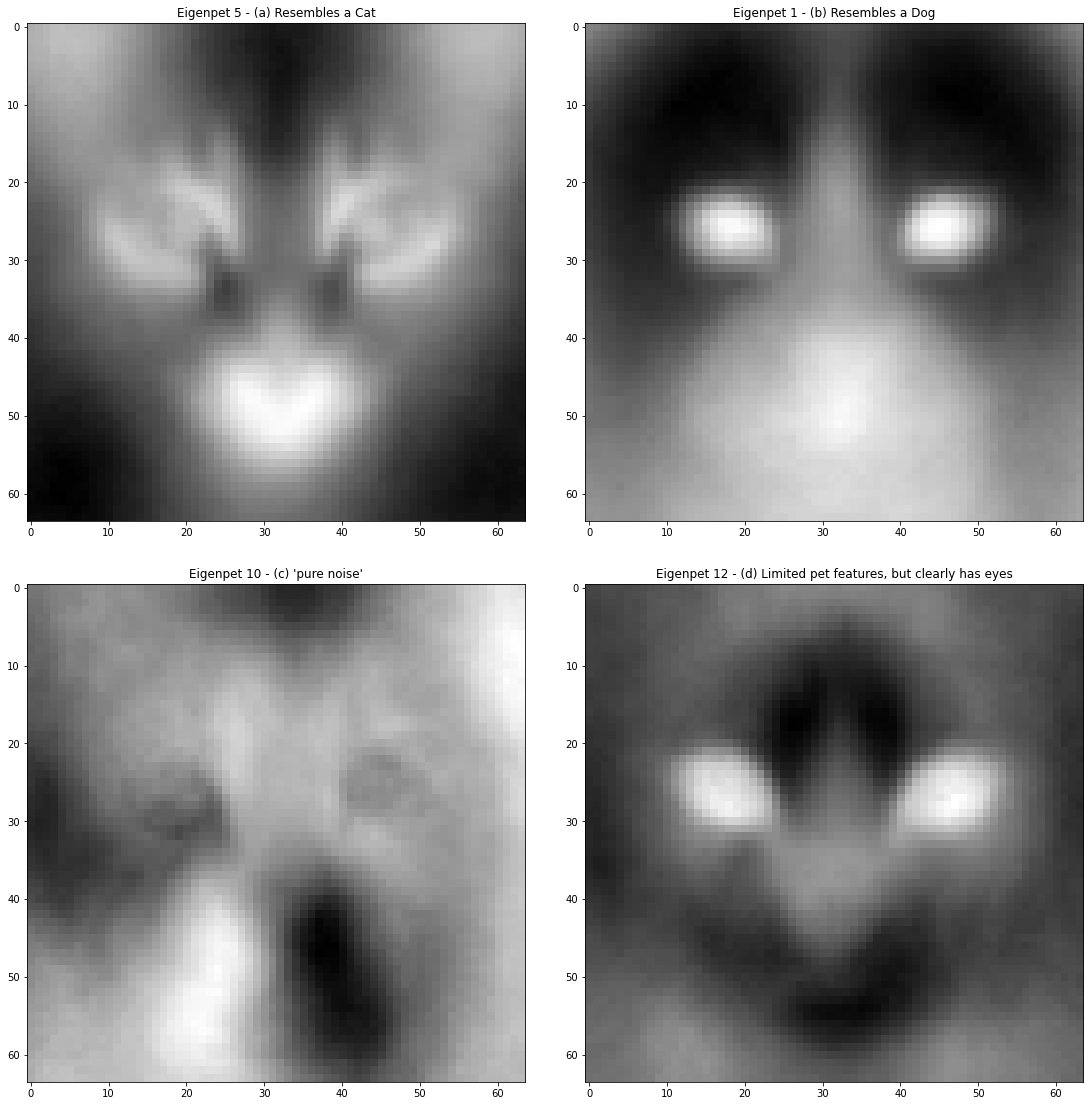

In [23]:
#Problem 10.6
pcaX = pca(Xtrain) #Determine PCA transform.
pcaXtranspose = pcaX.transpose() #Take transpose to be in the right format for show_image.
image_indices = [5, 1, 10, 12] #Indexing starts at 1 rather than 0 (code below handles this properly)
#The code below displays your eigenvectors as a 2 x 2 grid of 64 x 64 images.
img_descrips = [" - (a) Resembles a Cat", " - (b) Resembles a Dog", 
                " - (c) 'pure noise'", " - (d) Limited pet features, but clearly has eyes"]
plt.figure(figsize=(16,16))
for i in range(4):
    plt.subplot(2,2,i+1)
    image = pcaXtranspose[image_indices[i]-1,:]
    #reshape make into a square
    image = image.reshape((64,64))
    #display the image
    plt.imshow(image,'gray')
    plt.title("Eigenpet "+str(image_indices[i]) + img_descrips[i])
plt.tight_layout(pad=3)
plt.savefig("HW10-Prob6-PCA.png")

Notes about each eigen vector:

0. Very clearly can see **EYES**; looks more like a **dog though**; "ghost dog" -- **DOG EXAMPLE**
1. Nothing very distinctive in my opinion
2. NOSE - very clearly highlighting nose feature; more likely the nose of a cat though
3. very white ... not much there in my opinion

4. **CAT** - this image looks a lot like a cat - **CAT EXAMPLE**
5. Looks a little like a dog but not very much - eyes and nose pretty clear
6. facial features of a dog a little; similar to picture 0 with less defined features
7. dog nose - Ths one looks pretty noisy but the round dot of a dog's nose is visible

8. mostly noise
9. **Best example of noise that I have seen** -- **EXAMPLE OF NOISE THAT I USED**
10. pretty noisy ... some features visible
11. **ALL EYES**    -               **EYES ONLY EXAMPLE**

12. can see eye features a little; but noisy
13. dog nose feature; but noisy
14. **very noisy** ... doesn't look like much
15. **eyes, cat** - it really is noisy but you can make out a face at least

In [31]:
#This function takes in a training data matrix Xtrain and uses
#it to compute the PCA basis and a sample mean vector. 
#It also takes in a test data matrix Xtest and a dimension k. 
#It first centers the data matrices Xtrain and Xtest by subtracting the
#Xtrain sample mean vector from each of their rows. It then uses the 
#top-k vectors in the PCA basis to project the centered Xtrain and Xtest
#data matrices into a k-dimensional space, and outputs
#the resulting data matrices as Xtrain_reduced and Xtest_reduced.
def reduce_data(Xtrain,Xtest,k):
    mu_train = np.mean(Xtrain, axis=0)
    print("The dimensions of mu_train are {}".format(mu_train.shape))
    
    # Centering Xtest
    Xtest_cent = Xtest - mu_train       # should be (rows x 4096) - (1 x 4096) --- subtracting mu_train from each row
    Xtrain_cent = Xtrain - mu_train
    print("The dimensions of centered vectors are {}".format(Xtest_cent.shape))
    
    # Need PCA matrices/data -- NOTE: the eigen vectors come as the rows from the PCA function (I THINK)
    pcaX = pca(Xtrain)
    print("The dimensions of pcaX are {}".format(pcaX.shape))
    
    # extract the first k "ROWS" (specific to my approach) of pcaX
    Vk = pcaX[0:k,:].T   # extract certain rows and transpose
    print("The dimensions of the Vk are {}".format(Vk.shape))
    
    # multiplication to produce the reduced matrices
    Xtrain_reduced = Xtrain_cent @ Vk
    Xtest_reduced = Xtest_cent @ Vk
    
    #Your code should go above this line.
    if (Xtrain_reduced.shape[0]!=Xtrain.shape[0]):
        raise Exception("The number of rows in Xtrain_reduced is not the same as the number of rows in Xtrain.")
    elif (Xtest_reduced.shape[0]!=Xtest.shape[0]):
        raise Exception("The number of rows in Xtest_reduced is not the same as the number of rows in Xtest.")
    elif (Xtrain_reduced.shape[1]!=k):
        raise Exception("The number of columns in Xtrain_reduced is not equal to k.")
    elif (Xtest_reduced.shape[1]!=k):
        raise Exception("The number of columns in Xtest_reduced is not equal to k.")
        
    return Xtrain_reduced, Xtest_reduced

## Pardon the messy printout after the next code block, the information is neatly organized below the print outs
*The extra printouts should disappear if the code is run again*

In [32]:
#For PCA-reduced data with dimension k = 50, linear discriminant analysis training error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 50, linear discriminant test error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 50, perceptron training error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 50, perceptron test error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 100, linear discriminant analysis training error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 100, linear discriminant test error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 100, perceptron training error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 100, perceptron test error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 200, linear discriminant analysis training error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 200, linear discriminant test error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 200, perceptron training error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 200, perceptron test error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 400, linear discriminant analysis training error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 400, linear discriminant test error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 400, perceptron training error rate is [YOUR VALUE].
#For PCA-reduced data with dimension k = 400, perceptron test error rate is [YOUR VALUE].

#Problem 10.7
kvalues = np.array([50,100,200,400])
for i in range(len(kvalues)):
    k = kvalues[i]
    Xtrain_reduced, Xtest_reduced = reduce_data(Xtrain,Xtest,k)
    yguesstrain = perceptron(Xtrain_reduced,ytrain,Xtrain_reduced)
    yguesstest = perceptron(Xtrain_reduced,ytrain,Xtest_reduced)
    training_error = error_rate(yguesstrain,ytrain)
    test_error = error_rate(yguesstest,ytest)
    print ("For PCA-reduced data with dimension k = "+str(k)+", perceptron training error rate is "+str(round(training_error,1))+"%.")
    print ("For PCA-reduced data with dimension k = "+str(k)+", perceptron test rate is "+str(round(test_error,1))+"%.")  
    yguesstrain = lda(Xtrain_reduced,ytrain,Xtrain_reduced)
    yguesstest = lda(Xtrain_reduced,ytrain,Xtest_reduced)
    training_error = error_rate(yguesstrain,ytrain)
    test_error = error_rate(yguesstest,ytest)
    print ("For PCA-reduced data with dimension k = "+str(k)+", linear discriminant analysis training error rate is "+str(round(training_error,1))+"%.")
    print ("For PCA-reduced data with dimension k = "+str(k)+", linear discriminant analysis test error rate is "+str(round(test_error,1))+"%.")    

The dimensions of mu_train are (4096,)
The dimensions of centered vectors are (400, 4096)
The dimensions of pcaX are (4096, 4096)
The dimensions of the Vk are (4096, 50)
(1, 50)
(50, 1)
(1, 50)
(50, 1)
For PCA-reduced data with dimension k = 50, perceptron training error rate is 13.9%.
For PCA-reduced data with dimension k = 50, perceptron test rate is 17.8%.
From average_pet() function, shapes of avg_cat and avg_dog:
(1, 50)
(1, 50)
Shape of Covariance matrix for cat data: (50, 50)
Shape of Covariance matrix for dog data: (50, 50)
Shape of X_arr: (1, 50)
Shape of inv_cov_mat: (50, 50)
Shape of means_vd: (1, 50)
From average_pet() function, shapes of avg_cat and avg_dog:
(1, 50)
(1, 50)
Shape of Covariance matrix for cat data: (50, 50)
Shape of Covariance matrix for dog data: (50, 50)
Shape of X_arr: (1, 50)
Shape of inv_cov_mat: (50, 50)
Shape of means_vd: (1, 50)
For PCA-reduced data with dimension k = 50, linear discriminant analysis training error rate is 13.9%.
For PCA-reduced dat

### Results from Problem 10.7

#### k = 50

* For PCA-reduced data with dimension k = 50, perceptron training error rate is **13.9%**.
* For PCA-reduced data with dimension k = 50, perceptron test rate is **17.8%**.

* For PCA-reduced data with dimension k = 50, linear discriminant analysis training error rate is **13.9%**.
* For PCA-reduced data with dimension k = 50, linear discriminant analysis test rate is **17.5%**

#### k = 100

* For PCA-reduced data with dimension k = 100, perceptron training error rate is **9.5%**.
* For PCA-reduced data with dimension k = 100, perceptron test rate is **13.5%**

* For PCA-reduced data with dimension k = 100, linear discriminant analysis training error rate is **9.4%**.
* For PCA-reduced data with dimension k = 100, linear discriminant analysis test rate is **13.5%**.

#### k = 200

* For PCA-reduced data with dimension k = 200, perceptron training error rate is **5.8%**.
* For PCA-reduced data with dimension k = 200, perceptron test rate is **10.0%**.

* For PCA-reduced data with dimension k = 200, linear discriminant analysis training error rate is **5.7%**.
* For PCA-reduced data with dimension k = 200, linear discriminant analysis test rate is **10.0%**.

#### k = 400

* For PCA-reduced data with dimension k = 200, perceptron training error rate is **3.6%**.
* For PCA-reduced data with dimension k = 200, perceptron test rate is **10.2%**.

* For PCA-reduced data with dimension k = 200, linear discriminant analysis training error rate is **3.6%**.
* For PCA-reduced data with dimension k = 200, linear discriminant analysis test rate is **10.2%**.